# Nanomotif

Nanomotif is a Python package that provides functionality for analyzing and manipulating DNA sequences. It is designed to help researchers in the field of nanotechnology and DNA nanotechnology to analyze and work with DNA sequences more effectively. With Nanomotif, you can perform tasks such as motif identification, sequence enrichment analysis, and sequence manipulation.

## Installation

### Local Environment

To install Nanomotif in your local Python environment, follow these steps:

```shell
git clone https://github.com/your-username/nanomotif.git
cd nanomotif
pip install -r requirements.txt
pip install .
```

### Conda Environment

If you prefer using Conda for managing your Python environments, you can create a new environment and install Nanomotif as follows:

```shell
conda create -n nanomotif-env python=3.9
conda activate nanomotif-env
git clone https://github.com/your-username/nanomotif.git
cd nanomotif
conda install --file requirements.txt
python -m pip install .
```

## Example Usage

Here's an example to demonstrate how to use Nanomotif to perform sequence enrichment analysis:

In [123]:
from nanomotif.motifs import SequenceEnrichment
from nanomotif import dna
import matplotlib.pyplot as plt
sequences = [ 
        dna.generate_random_dna_sequence(6) +
        dna.generate_random_dna_sequence(1, alphabet=["G"]*97 + ["T", "A", "G"]) +
        dna.generate_random_dna_sequence(1, alphabet=["A"]*97 + ["T", "C", "G"]) +
        dna.generate_random_dna_sequence(1, alphabet=["T"]*97 + ["G", "C", "T"]) +
        dna.generate_random_dna_sequence(1, alphabet=["C"]*97 + ["C", "A", "G"]) +
        dna.generate_random_dna_sequence(7)
        for _ in range(20000)
    ]
seq_enrichment = SequenceEnrichment(sequences)

# Calculate the positional frequency of each nucleotide
seq_enrichment.pssm()

array([[2.48375e-01, 2.48825e-01, 2.50575e-01, 2.50325e-01, 2.47775e-01,
        2.49725e-01, 1.03250e-02, 9.69425e-01, 2.50000e-05, 1.02750e-02,
        2.50775e-01, 2.52325e-01, 2.54825e-01, 2.48625e-01, 2.51775e-01,
        2.47525e-01, 2.51275e-01],
       [2.54225e-01, 2.47725e-01, 2.52825e-01, 2.47075e-01, 2.53825e-01,
        2.46925e-01, 9.07500e-03, 1.02250e-02, 9.81925e-01, 2.50000e-05,
        2.50275e-01, 2.46675e-01, 2.48725e-01, 2.48875e-01, 2.52225e-01,
        2.46975e-01, 2.48575e-01],
       [2.44875e-01, 2.52025e-01, 2.47925e-01, 2.49625e-01, 2.49275e-01,
        2.50525e-01, 9.80675e-01, 1.11750e-02, 9.32500e-03, 9.77500e-03,
        2.53375e-01, 2.52075e-01, 2.51175e-01, 2.47175e-01, 2.45725e-01,
        2.54275e-01, 2.48625e-01],
       [2.52625e-01, 2.51525e-01, 2.48775e-01, 2.53075e-01, 2.49225e-01,
        2.52925e-01, 2.50000e-05, 9.27500e-03, 8.82500e-03, 9.80025e-01,
        2.45675e-01, 2.49025e-01, 2.45375e-01, 2.55425e-01, 2.50375e-01,
        2.51325e-01

In [124]:
# Get the consensus sequence
seq_enrichment.consensus()

'TGTCTCGATCGAACTGC'

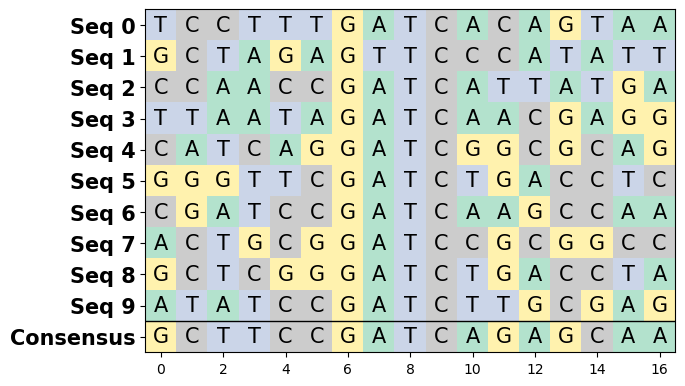

In [125]:
# Plot sequences
dna.plot_dna_sequences(sequences[0:10]);

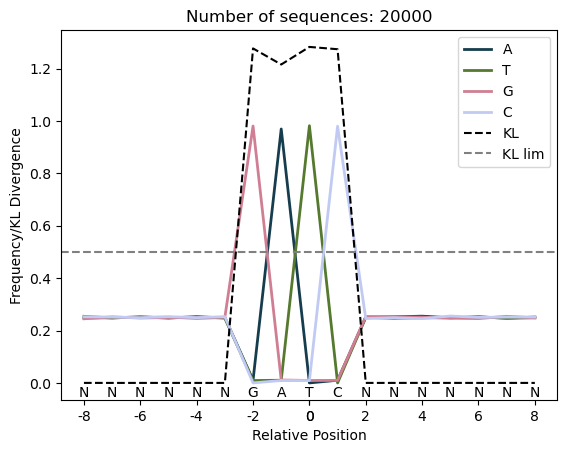

In [126]:
# Plot positional enrichment of each position
seq_enrichment.plot_enrichment()
plt.legend();

Evaluate positional enrichment in context of a specific prior distribution. 

E.g. the position-specific scoring matrix (PSSM) another set of sequences, or a uniform distribution. Positional enrichment can then be detected.

Usefull if the enrichment sequences come from a group of sequences that are not uniform in their nucleotide distribution.


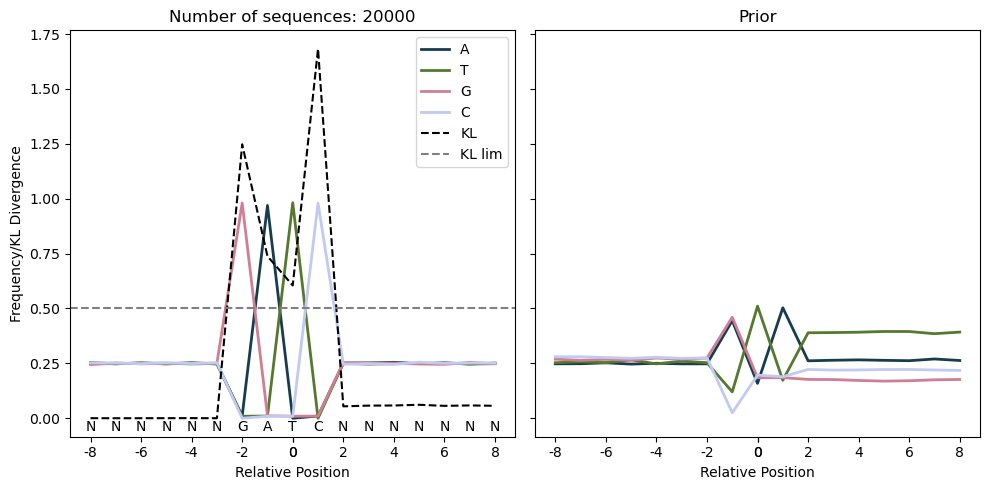

In [127]:
# Other sequences with wierd patterns
wierd_sequences = SequenceEnrichment(
    [
        dna.generate_random_dna_sequence(7) +
        dna.generate_random_dna_sequence(1, alphabet=["A", "G"]*3 + ["T", "A", "G"]) +
        dna.generate_random_dna_sequence(1, alphabet=["T"]*3 + ["C", "A", "G"]) +
        dna.generate_random_dna_sequence(1, alphabet=["A"]*3 + ["T", "C", "G"]) +
        dna.generate_random_dna_sequence(7, alphabet=["C"]*20 + ["G"]*16 + ["A"]*27 + ["T"]*39) 
        for _ in range(10000)
    ]
)

seq_enrichment.update_kl_prior(wierd_sequences.pssm())
seq_enrichment.plot_enrichment_with_prior();

## K-mer connections in sequences

Usefull for evaluation multiple enriched motifs in sequences. 

In [128]:
exmaple_kmer_graph = dna.kmer_graph(sequences, kmer_size=2)
exmaple_kmer_graph

from,to,position,count
str,str,i64,u32
"""AA""","""AA""",4,8
"""AA""","""AA""",9,17
"""AA""","""AA""",5,50
"""AA""","""AA""",14,276
"""AA""","""AA""",1,283
"""AA""","""AA""",10,297
"""AA""","""AA""",3,304
"""AA""","""AA""",13,304
"""AA""","""AA""",2,311


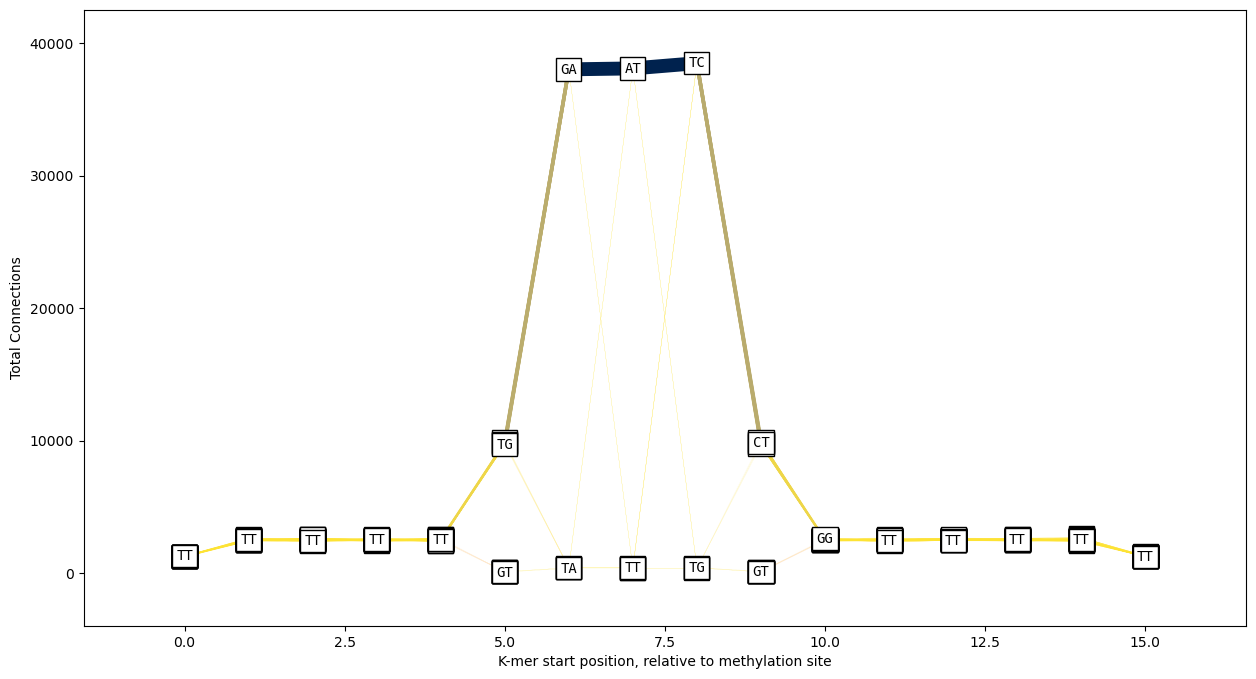

In [129]:
dna.plot_kmer_graph(dna.kmer_graph(sequences, kmer_size=2), y_axis="connections");

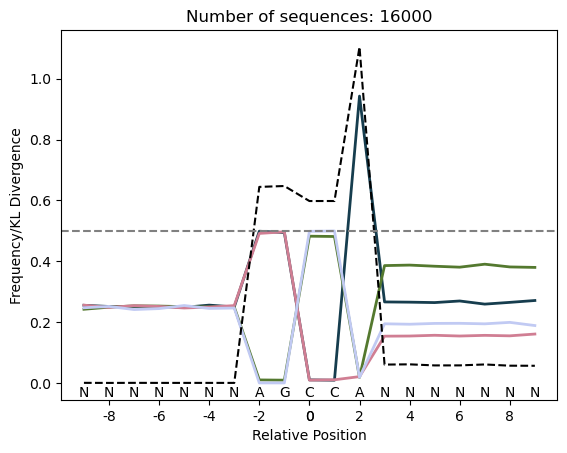

In [130]:
all_random = SequenceEnrichment(
    [
        dna.generate_random_dna_sequence(7) +
        dna.generate_random_dna_sequence(1, alphabet=["A", "G"]*50 + ["T", "A", "G"]) +
        dna.generate_random_dna_sequence(1, alphabet=["A", "G"]*50 + ["T", "A", "G"]) +
        dna.generate_random_dna_sequence(1, alphabet=["T", "C"]*50 + ["C", "A", "G"]) +
        dna.generate_random_dna_sequence(1, alphabet=["T", "C"]*50 + ["C", "A", "G"]) +
        dna.generate_random_dna_sequence(1, alphabet=["A"]*50 + ["T", "C", "G"]) +
        dna.generate_random_dna_sequence(7, alphabet=["C"]*20 + ["G"]*16 + ["A"]*27 + ["T"]*39) 
        for _ in range(16000)
    ]
)
all_random.plot_enrichment();

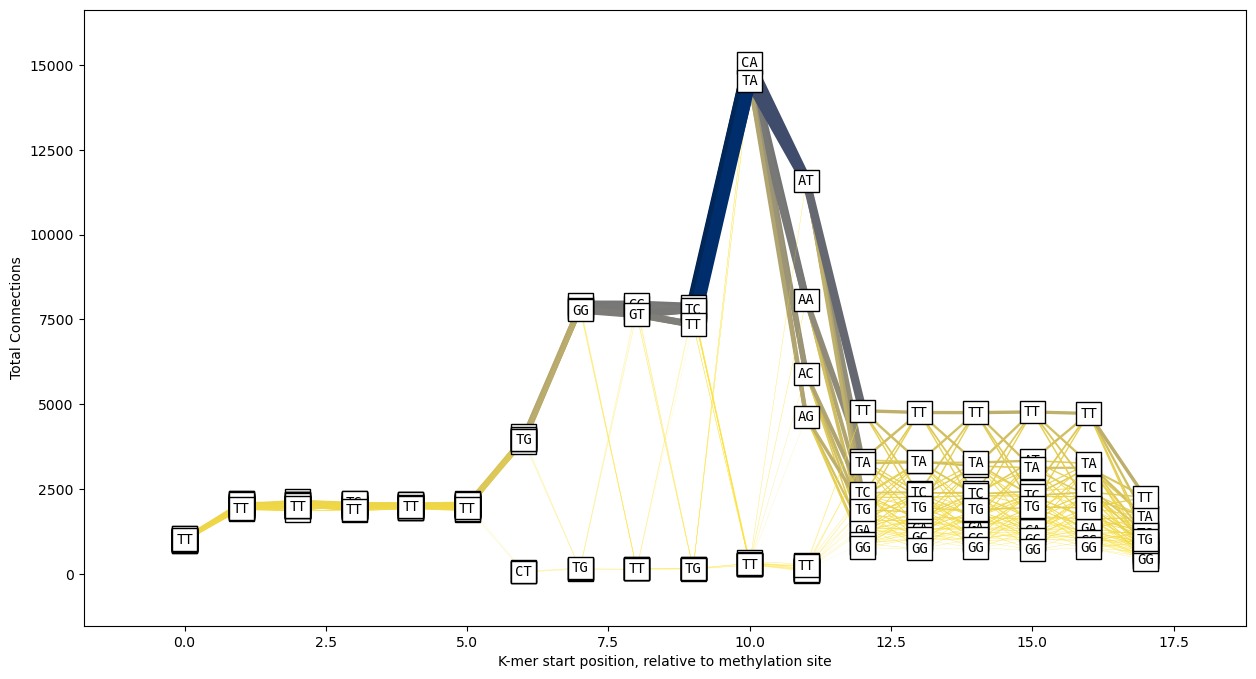

In [131]:
dna.plot_kmer_graph(dna.kmer_graph(all_random.sequences, kmer_size=2), y_axis="connections");

In [132]:
# Same positional freuqncies, but different connections
all_connected = SequenceEnrichment(
    [
        dna.generate_random_dna_sequence(7) +
        dna.generate_random_dna_sequence(1, alphabet=["A"]*100 + ["T", "A", "G"]) +
        dna.generate_random_dna_sequence(1, alphabet=["A"]*100 + ["T", "A", "G"]) +
        dna.generate_random_dna_sequence(1, alphabet=["T"]*100 + ["C", "A", "G"]) +
        dna.generate_random_dna_sequence(1, alphabet=["T"]*100 + ["C", "A", "G"]) +
        dna.generate_random_dna_sequence(1, alphabet=["A"]*50 + ["T", "C", "A"]) +
        dna.generate_random_dna_sequence(7, alphabet=["C"]*20 + ["G"]*16 + ["A"]*27 + ["T"]*39) 
        for _ in range(8200)
    ] + [
        dna.generate_random_dna_sequence(7) +
        dna.generate_random_dna_sequence(1, alphabet=["G"]*100 + ["T", "A", "C"]) +
        dna.generate_random_dna_sequence(1, alphabet=["G"]*100 + ["T", "A", "C"]) +
        dna.generate_random_dna_sequence(1, alphabet=["C"]*100 + ["T", "A", "G"]) +
        dna.generate_random_dna_sequence(1, alphabet=["C"]*100 + ["T", "A", "G"]) +
        dna.generate_random_dna_sequence(1, alphabet=["A"]*50 + ["T", "C", "G"]) +
        dna.generate_random_dna_sequence(7, alphabet=["C"]*20 + ["G"]*16 + ["A"]*27 + ["T"]*39) 
        for _ in range(7800)
    ]
)
all_connected.plot_enrichment();

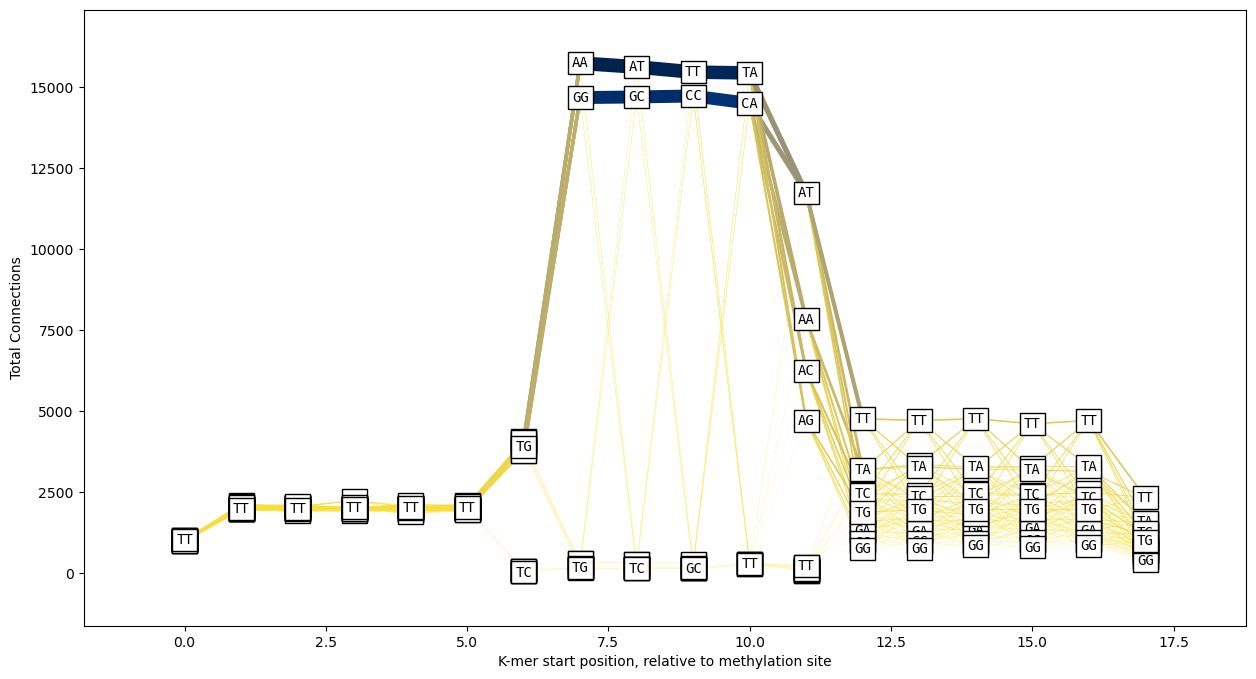

In [ ]:
dna.plot_kmer_graph(dna.kmer_graph(all_connected.sequences, kmer_size=2), y_axis="connections");


## Documentation [Not yet implemented]

For detailed documentation and examples of all available functionalities in Nanomotif, please refer to the [official documentation](https://nanomotif-docs/docs). It provides comprehensive information on the various classes, methods, and parameters, along with usage examples and explanations.

## Contributing

We welcome contributions to Nanomotif! If you encounter any issues, have suggestions for improvements, or would like to add new features, please open an issue or submit a pull request on the [Nanomotif GitHub repository](https://github.com/SorenHeidelbach/nanomotif). We appreciate your feedback and contributions to make Nanomotif even better.

## License

Nanomotif is released under the [MIT License](https://github.com/your-username/nanomotif/blob/main/LICENSE). Feel free to use, modify, and distribute the package in accordance with the terms of the license.

## Acknowledgments

Nanomotif builds upon various open-source libraries and tools that are instrumental in its functionality. We would like to express our gratitude to the developers and contributors of these projects for their valuable work.

